In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
bc = mcolors.BASE_COLORS
%matplotlib inline

import seaborn as sns
sns.set()

plt.rcdefaults()
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8,4)

import matplotlib.ticker as ticker


%config InlineBackend.figure_format = 'retina'

In [2]:
def toFixed(numObj, digits=0):
    return f"{numObj:.{digits}f}"

def operation_st(operation):
    if (type(operation) == int):
        if (operation == 65 or operation == 80):
            return True
    return False

def low_case(product):
    if (product == 'DEBIT'): return 'Debit'
    if (product == 'CREDIT'): return 'Credit'
    if (product == 'PREPAID'): return 'Prepaid'
    return product

In [3]:
xl = pd.ExcelFile('/Users/artyom/Downloads/Тест Qiwi_аналитик.xlsx')
df = xl.parse('Данные')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036261 entries, 0 to 1036260
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Месяц                  1036261 non-null  datetime64[ns]
 1   Статус транзакци       1036261 non-null  int64         
 2   Мерчант                1036261 non-null  object        
 3   Категория мерчанта     1036261 non-null  object        
 4   Канал                  1036261 non-null  int64         
 5   МПС                    1036261 non-null  object        
 6   Продукт карты          1004071 non-null  object        
 7   Признак карты          1035385 non-null  float64       
 8   Страна карты           1035986 non-null  float64       
 9   Банк rus               975297 non-null   object        
 10  Bank eng               494809 non-null   object        
 11  Оборот                 1035384 non-null  float64       
 12  Количество транзакций  10362

,Месяц,Статус транзакци,Мерчант,Категория мерчанта,Канал,МПС,Продукт карты,Признак карты,Страна карты,Банк rus,Bank eng,Оборот,Количество транзакций,Доход от мерчанта,Расход на МПС
0,2019-01-01,65,Мерчант9,Категория1,1105,MasterCard,Debit,0.0,643.0,Альфа-банк,JOINT STOCK COMPANY ALFA-BANK,38.382353,1.000000,0.920354,-1.053097
1,2019-01-01,65,Мерчант8,Категория1,1100,VISA,Debit,0.0,643.0,NaN,PUBLIC JOINT-STOCK COMPANY BANK OTKRITIE FINAN...,50.000000,11.764706,1.203540,-1.353982
2,2019-01-01,65,Мерчант8,Категория1,1100,VISA,Debit,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,4.705882,11.764706,0.115044,-0.123894
3,2019-01-01,65,Мерчант13,Категория1,1230,VISA,Credit,0.0,643.0,NaN,VTB BANK PJSC,83.864706,23.529412,0.884956,-0.061947
4,2019-01-01,65,Мерчант8,Категория1,1368,MasterCard,Debit,0.0,643.0,Сбербанк России,SBERBANK OF RUSSIA,23.823529,17.647059,0.575221,-0.575221


In [5]:
df['Количество транзакций'] = round(df['Количество транзакций'])
df['Net Revenue'] = df['Доход от мерчанта'] + df['Расход на МПС']
df['Статус транзакци'] = df['Статус транзакци'].apply(operation_st)
df['Продукт карты'] = df['Продукт карты'].apply(low_case)

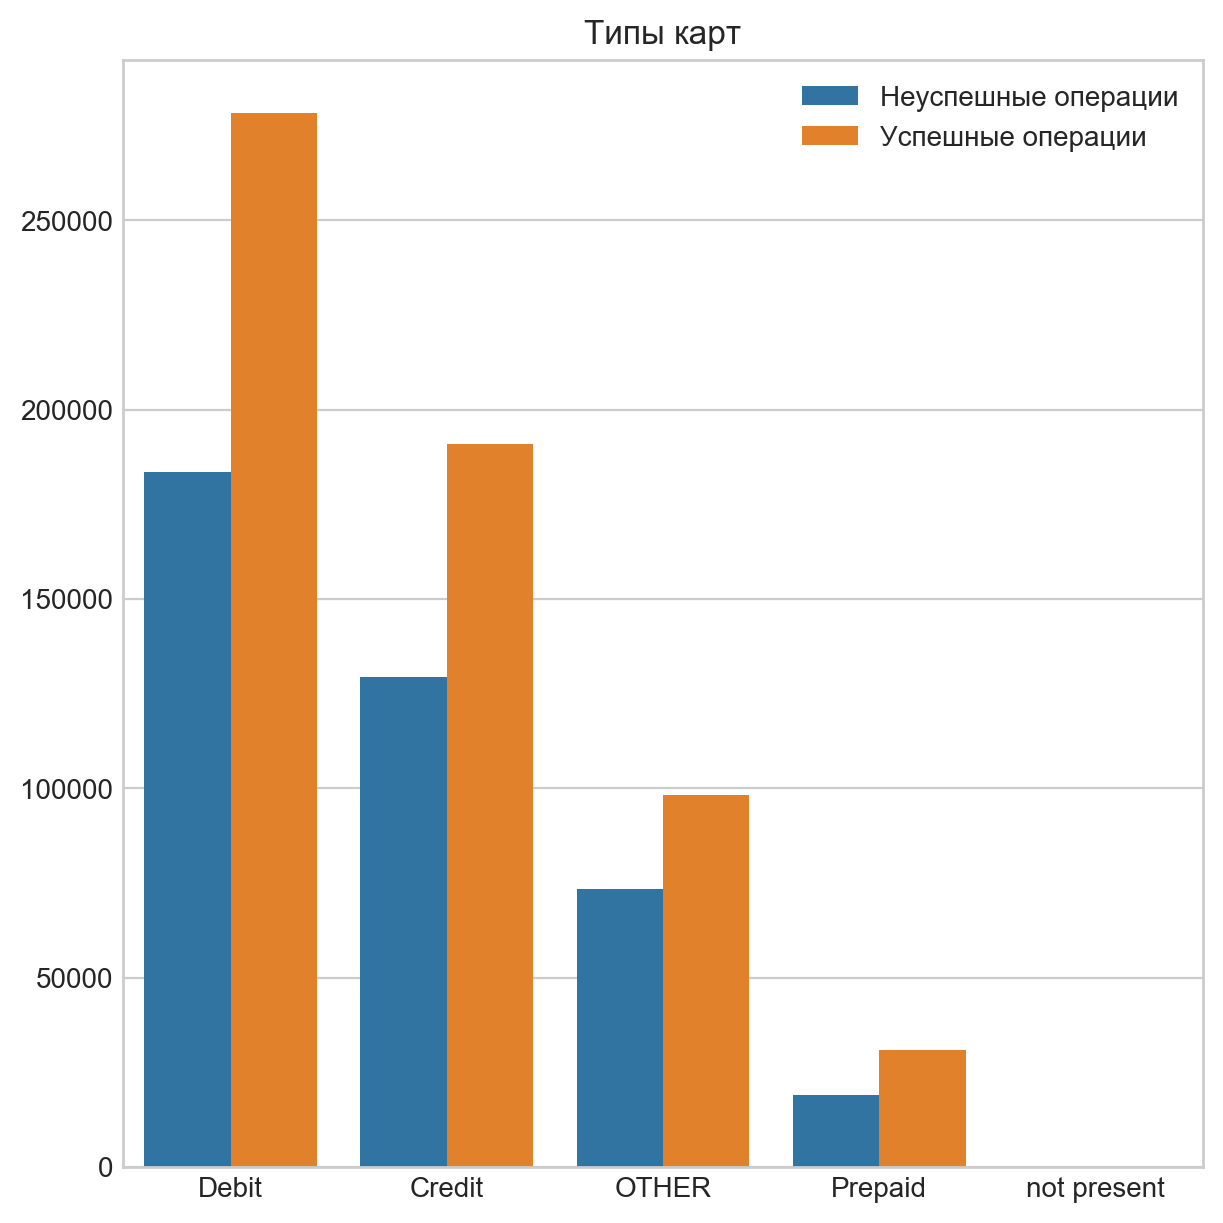

In [6]:
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

chart = sns.countplot(x='Продукт карты', hue='Статус транзакци', data=df);
plt.xlabel(''), plt.ylabel('')
chart.set_title('Типы карт')
chart.legend(['Неуспешные операции', 'Успешные операции'], bbox_to_anchor=(1, 1), fontsize=10)

In [7]:
suc_operations = df[df['Статус транзакци'] == True]

Text(0.5, 0, '')

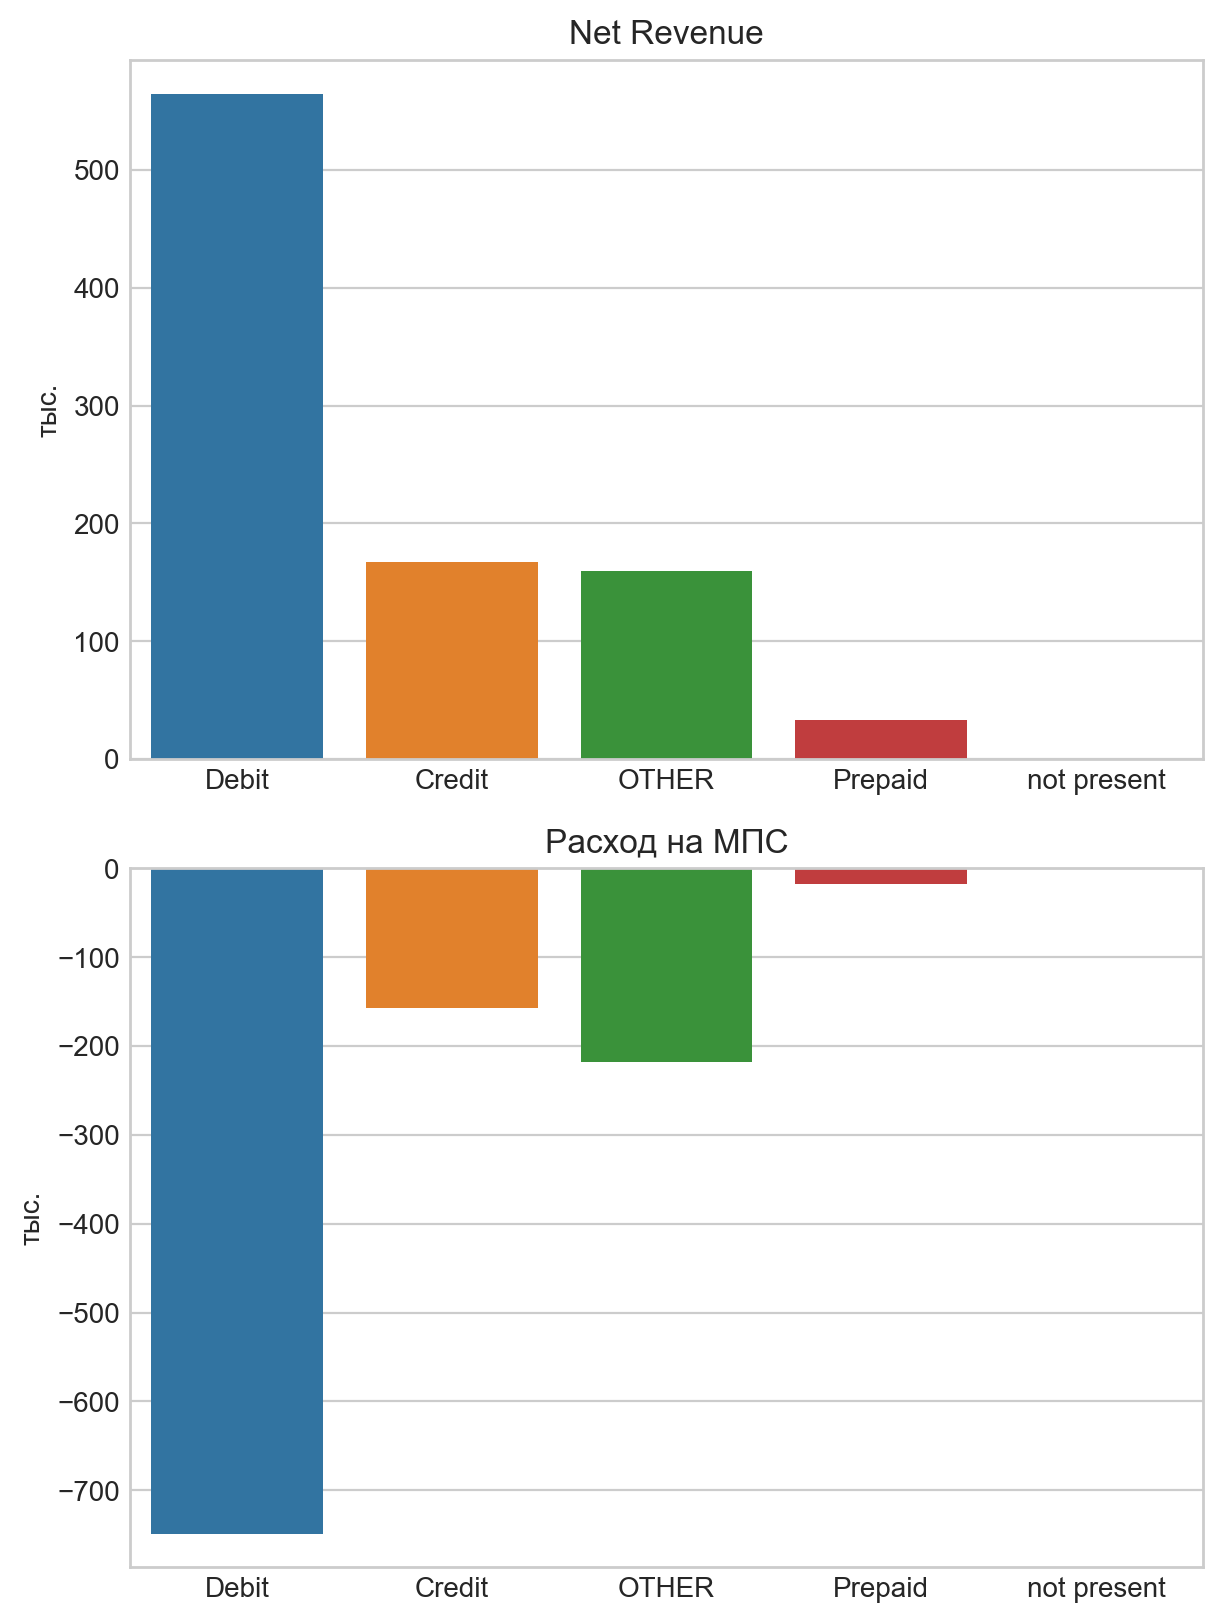

In [8]:
fg = plt.figure(figsize=(6, 8), constrained_layout=True)
gs = fg.add_gridspec(2, 1)

NR = suc_operations.groupby('Продукт карты').sum()
out_come = suc_operations.groupby('Продукт карты').sum()

fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('Net Revenue')
chart1 = sns.barplot(NR.index, NR['Net Revenue'] / 1e3, \
                    order=NR['Net Revenue'].sort_values(ascending=False).index)
plt.ylabel('тыс.')
plt.xlabel('')

fig_ax_2 = fg.add_subplot(gs[1, 0])
fig_ax_2.set_title('Расход на МПС')
chart2 = sns.barplot(out_come.index, out_come['Расход на МПС'] / 1e3, \
                    order=NR['Net Revenue'].sort_values(ascending=False).index)
plt.ylabel('тыс.')
plt.xlabel('')

Text(0.5, 0, '')

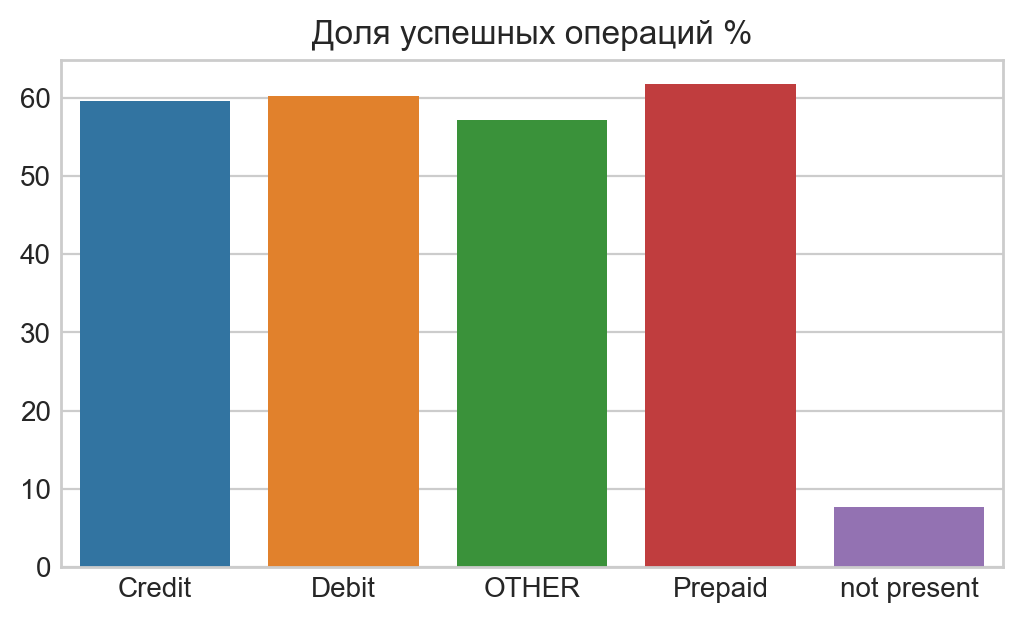

In [9]:
fg = plt.figure(figsize=(5, 3), constrained_layout=True)

suc_oper_part = suc_operations.groupby('Продукт карты')['Продукт карты'].count() / \
df.groupby('Продукт карты')['Продукт карты'].count()

chart = sns.barplot(suc_oper_part.index, suc_oper_part * 100)
chart.set_title('Доля успешных операций %')
plt.ylabel('')
plt.xlabel('')

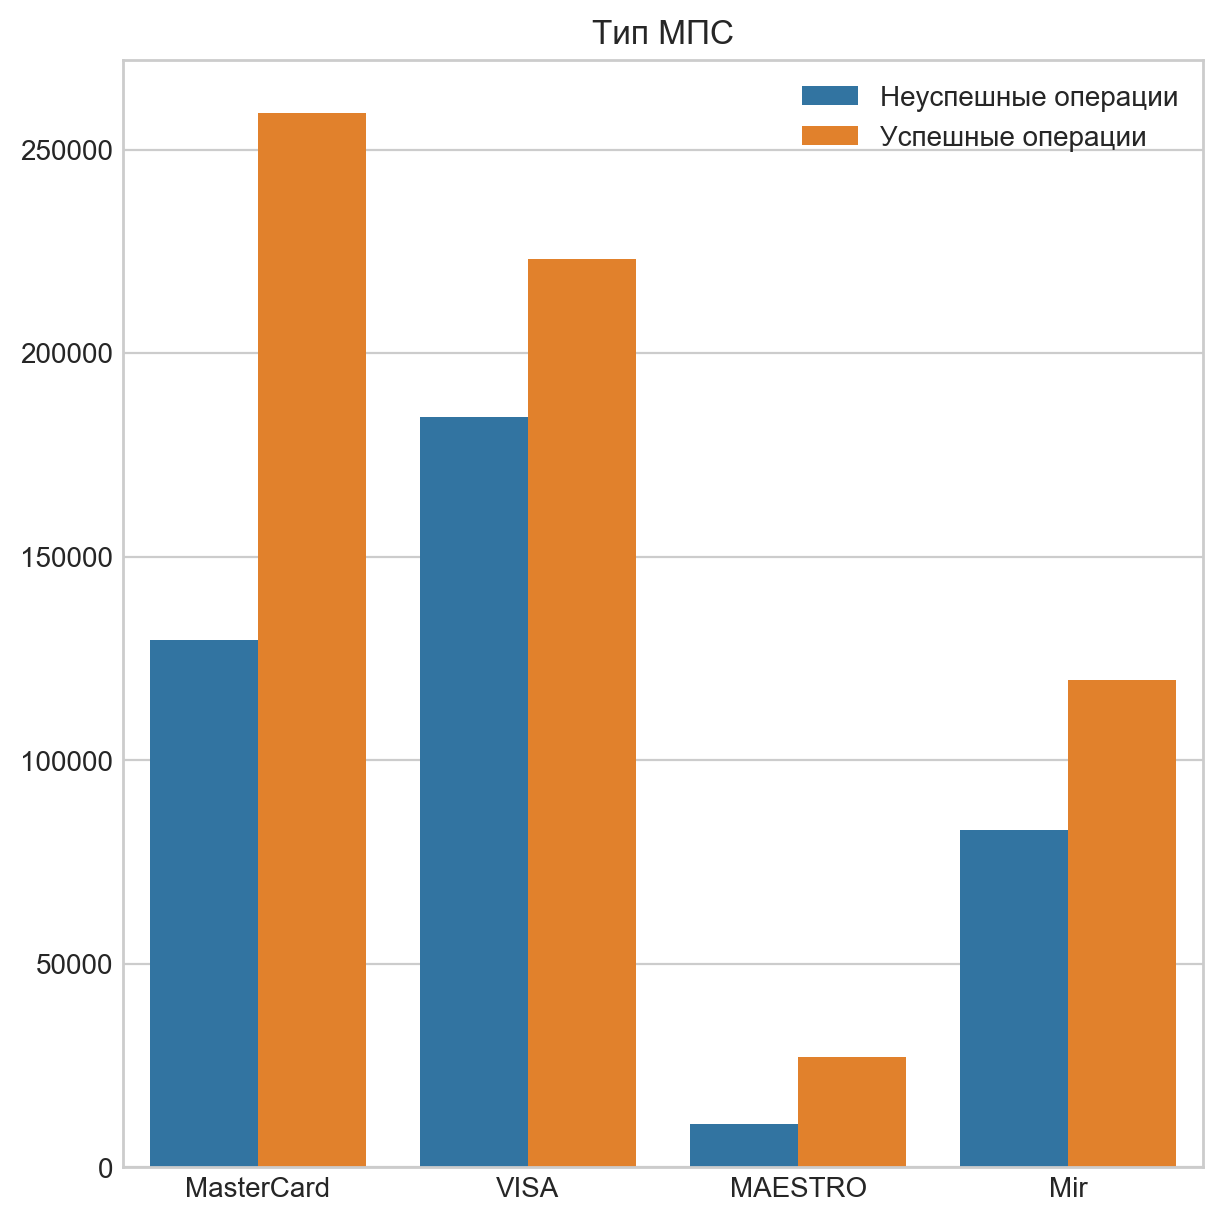

In [10]:
fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

chart = sns.countplot(x='МПС', hue='Статус транзакци', data=df);
plt.xlabel(''), plt.ylabel('')
chart.set_title('Тип МПС')
chart.legend(['Неуспешные операции', 'Успешные операции'], bbox_to_anchor=(1, 1), fontsize=10)

Text(0.5, 0, '')

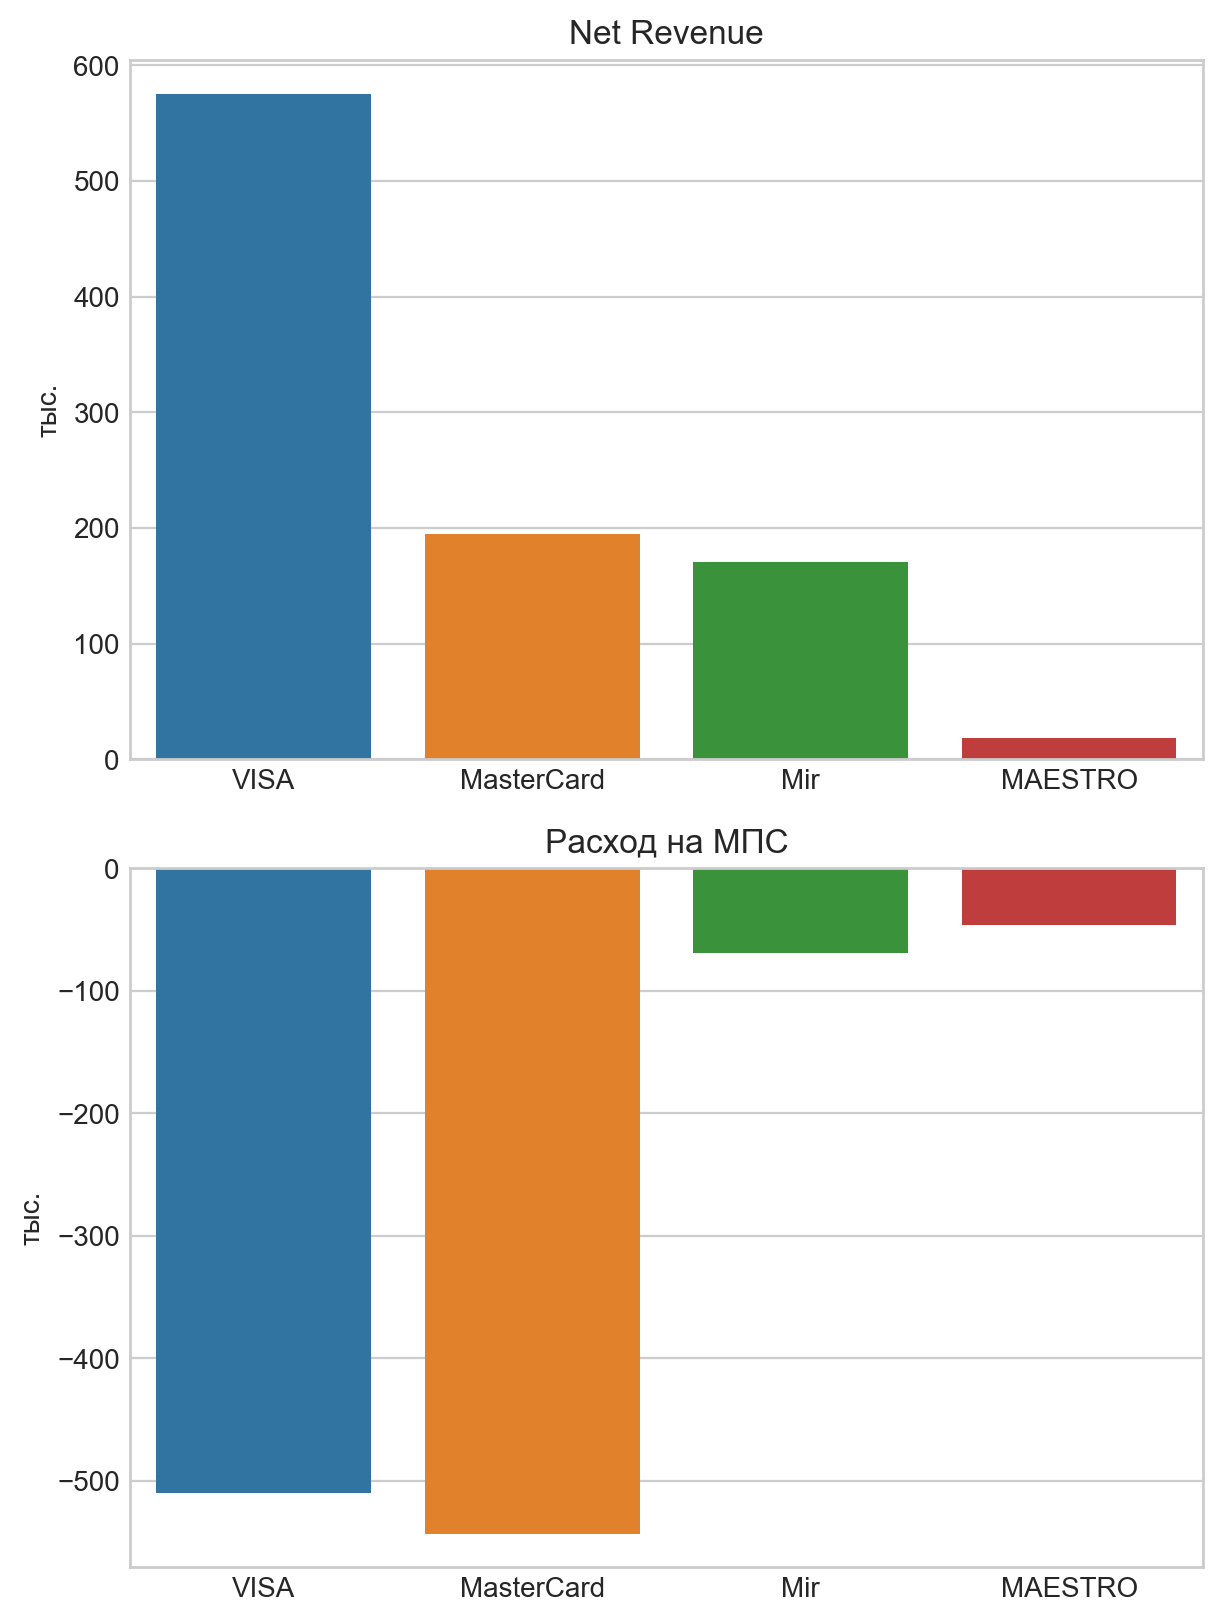

In [11]:
fg = plt.figure(figsize=(6, 8), constrained_layout=True)
gs = fg.add_gridspec(2, 1)

NR = suc_operations.groupby('МПС').sum()
out_come = suc_operations.groupby('МПС').sum()

fig_ax_1 = fg.add_subplot(gs[0, 0])
fig_ax_1.set_title('Net Revenue')
chart1 = sns.barplot(NR.index, NR['Net Revenue'] / 1e3, \
                    order=NR['Net Revenue'].sort_values(ascending=False).index)
plt.ylabel('тыс.')
plt.xlabel('')

fig_ax_2 = fg.add_subplot(gs[1, 0])
fig_ax_2.set_title('Расход на МПС')
chart2 = sns.barplot(out_come.index, out_come['Расход на МПС'] / 1e3, \
                    order=NR['Net Revenue'].sort_values(ascending=False).index)
plt.ylabel('тыс.')
plt.xlabel('')

Text(0.5, 0, '')

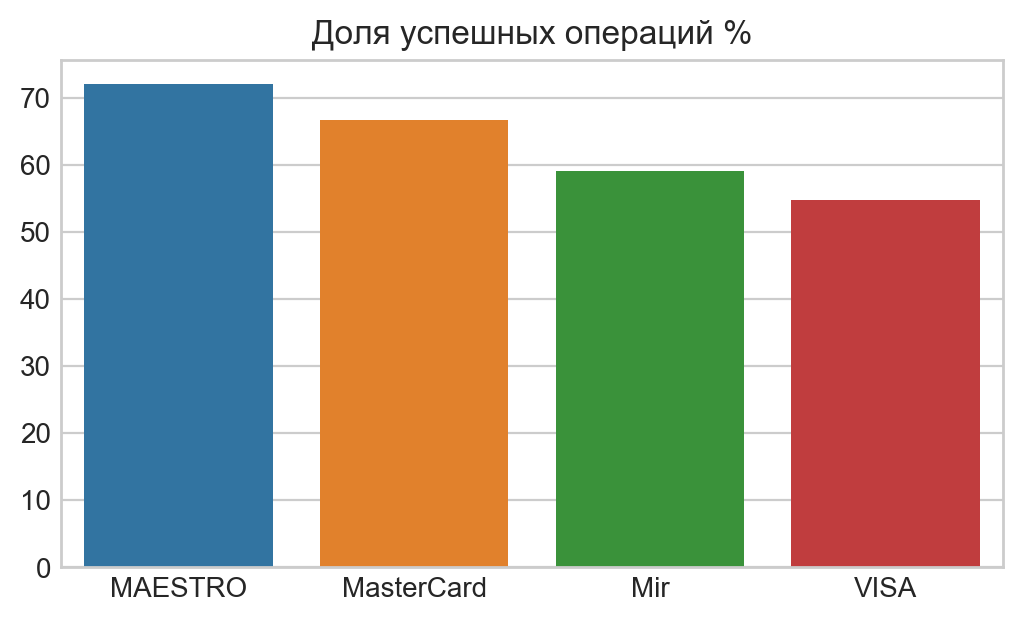

In [12]:
fg = plt.figure(figsize=(5, 3), constrained_layout=True)

suc_oper_part = suc_operations.groupby('МПС')['МПС'].count() / \
df.groupby('МПС')['МПС'].count()

chart = sns.barplot(suc_oper_part.index, suc_oper_part * 100)
chart.set_title('Доля успешных операций %')
plt.ylabel('')
plt.xlabel('')